## 棒棒糖图特征分析

[参考文档](https://networkx.org/documentation/stable/auto_examples/basic/plot_properties.html)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False

导入图

In [2]:
# 第一个参数指定头部节点数 第二个参数指定尾部节点数
G = nx.lollipop_graph(4, 7)

可视化

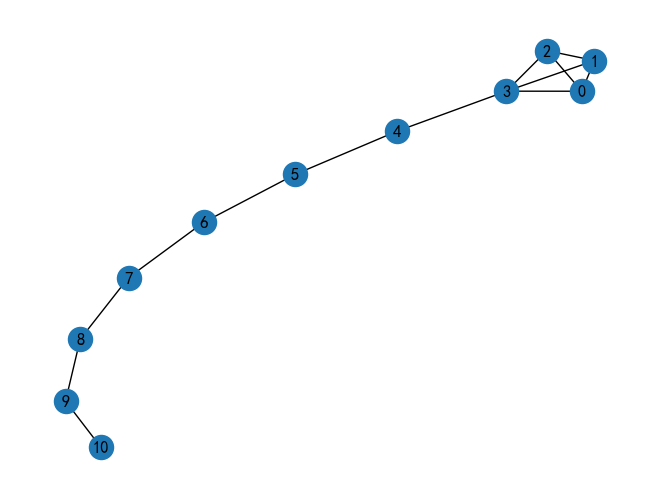

In [3]:
pos = nx.spring_layout(G, seed=3068)
nx.draw(G, pos, with_labels=True)
plt.show()

图数据分析

In [4]:
# 半径
nx.radius(G)

4

In [5]:
# 直径
nx.diameter(G)

8

In [6]:
# 偏心度: 每个节点导图中其他节点的最远距离
nx.eccentricity(G)

{0: 8, 1: 8, 2: 8, 3: 7, 4: 6, 5: 5, 6: 4, 7: 5, 8: 6, 9: 7, 10: 8}

In [7]:
# 中心节点: 偏心度与半径相等的节点
nx.center(G)

[6]

In [8]:
# 外围节点: 偏心度与直径相等的节点
nx.periphery(G)

[0, 1, 2, 10]

In [9]:
nx.density?

In [10]:
nx.density(G)

0.23636363636363636

n为节点个数 m为连接个数
对于无向图:
    $$ density = \frac{2m}{n(n-1)} $$
对于有向图:
    $$ density = \frac{m}{n(n-1)} $$

无连接图的density为0, 全连接图的density为1, Multigraph(多重连接图)和带self loop的图density可能大于1

3号节点到其他节点的最短距离

In [11]:
node_id = 3
nx.single_source_shortest_path_length(G, node_id)

{3: 0, 0: 1, 1: 1, 2: 1, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6, 10: 7}

每两个节点之间的最短距离

In [12]:
pathlengths = []
for v in G.nodes():
    spl = nx.single_source_shortest_path_length(G, v)
    for p in spl:
        print(f'{v} 到 {p} 最短距离 {spl[p]}')
        pathlengths.append(spl[p])

0 到 0 最短距离 0
0 到 1 最短距离 1
0 到 2 最短距离 1
0 到 3 最短距离 1
0 到 4 最短距离 2
0 到 5 最短距离 3
0 到 6 最短距离 4
0 到 7 最短距离 5
0 到 8 最短距离 6
0 到 9 最短距离 7
0 到 10 最短距离 8
1 到 1 最短距离 0
1 到 0 最短距离 1
1 到 2 最短距离 1
1 到 3 最短距离 1
1 到 4 最短距离 2
1 到 5 最短距离 3
1 到 6 最短距离 4
1 到 7 最短距离 5
1 到 8 最短距离 6
1 到 9 最短距离 7
1 到 10 最短距离 8
2 到 2 最短距离 0
2 到 0 最短距离 1
2 到 1 最短距离 1
2 到 3 最短距离 1
2 到 4 最短距离 2
2 到 5 最短距离 3
2 到 6 最短距离 4
2 到 7 最短距离 5
2 到 8 最短距离 6
2 到 9 最短距离 7
2 到 10 最短距离 8
3 到 3 最短距离 0
3 到 0 最短距离 1
3 到 1 最短距离 1
3 到 2 最短距离 1
3 到 4 最短距离 1
3 到 5 最短距离 2
3 到 6 最短距离 3
3 到 7 最短距离 4
3 到 8 最短距离 5
3 到 9 最短距离 6
3 到 10 最短距离 7
4 到 4 最短距离 0
4 到 5 最短距离 1
4 到 3 最短距离 1
4 到 6 最短距离 2
4 到 0 最短距离 2
4 到 1 最短距离 2
4 到 2 最短距离 2
4 到 7 最短距离 3
4 到 8 最短距离 4
4 到 9 最短距离 5
4 到 10 最短距离 6
5 到 5 最短距离 0
5 到 4 最短距离 1
5 到 6 最短距离 1
5 到 3 最短距离 2
5 到 7 最短距离 2
5 到 0 最短距离 3
5 到 1 最短距离 3
5 到 2 最短距离 3
5 到 8 最短距离 3
5 到 9 最短距离 4
5 到 10 最短距离 5
6 到 6 最短距离 0
6 到 5 最短距离 1
6 到 7 最短距离 1
6 到 4 最短距离 2
6 到 8 最短距离 2
6 到 3 最短距离 3
6 到 9 最短距离 3
6 到 0 最短距离 4
6 到 1 最短距离 4
6 到 2 最短距离 4
6 到 10

In [13]:
# 平均最短距离
sum(pathlengths) / len(pathlengths)

3.2231404958677685

不同距离的节点对个数

In [14]:
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

dist


{0: 11, 1: 26, 2: 18, 3: 16, 4: 14, 5: 12, 6: 10, 7: 8, 8: 6}